# Program 1

In [24]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Set-2-Program-1-Conv.jpeg',)

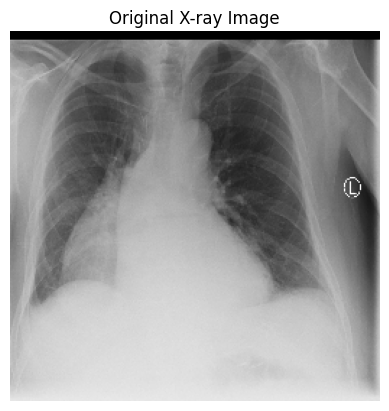

In [25]:
img = cv2.resize(img, (256, 256))

plt.imshow(img, cmap='gray')
plt.title('Original X-ray Image')
plt.axis('off')
plt.show()

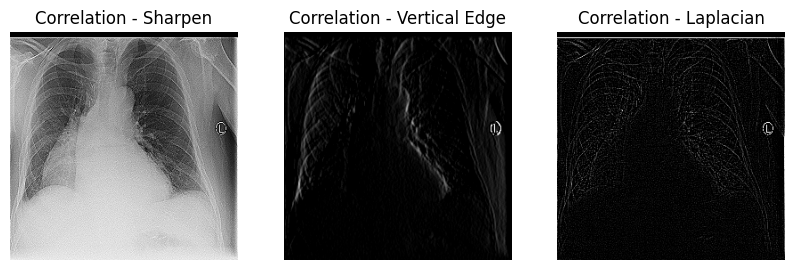

In [26]:
# 1

# Define 3 corr masks
mask1 = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])       

mask2 = np.array([[1, 0, -1],
                  [1, 0, -1],
                  [1, 0, -1]])       

mask3 = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])     

# Apply masks
corr1 = cv2.filter2D(img, -1, mask1)
corr2 = cv2.filter2D(img, -1, mask2)
corr3 = cv2.filter2D(img, -1, mask3)

titles = ['Correlation - Sharpen', 'Correlation - Vertical Edge', 'Correlation - Laplacian']
images = [corr1, corr2, corr3]

plt.figure(figsize=(10, 7))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()



- Defined three correlation kernels (sharpen, vertical edge, laplacian-like) and apply them using cv2.filter2D, which implements correlation when kernel is not flipped.
- Shows results for 3×3 kernels; visualizes how each mask highlights different features (sharpening, vertical edges, laplacian edges)

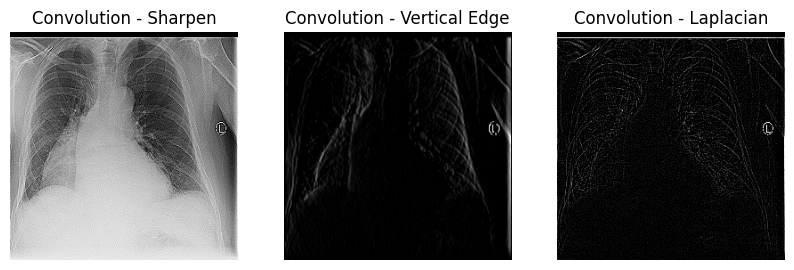

In [43]:
# 2

# Flip the masks 
def flip_kernel(kernel):
    return np.flipud(np.fliplr(kernel))

conv1 = cv2.filter2D(img, -1, flip_kernel(mask1))
conv2 = cv2.filter2D(img, -1, flip_kernel(mask2))
conv3 = cv2.filter2D(img, -1, flip_kernel(mask3))

# Display convolution results
titles = ['Convolution - Sharpen', 'Convolution - Vertical Edge', 'Convolution - Laplacian']
images = [conv1, conv2, conv3]
plt.figure(figsize=(10, 7))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

- Defined flip_kernel using np.flipud/fliplr and apply filter2D on flipped kernels to perform convolution.
- Demonstrates that convolution = correlation with a 180° flipped kernel; displays convolution outputs corresponding to previous correlation outputs.

- In correlation, the kernel slides over the image and multiplies pixel values directly.
- It highlights similar patterns without flipping the kernel.

### 3
- In template matching, correlation checks similarity between template and image region.
- Convolution, on the other hand, highlights edges and features rather than direct similarity.


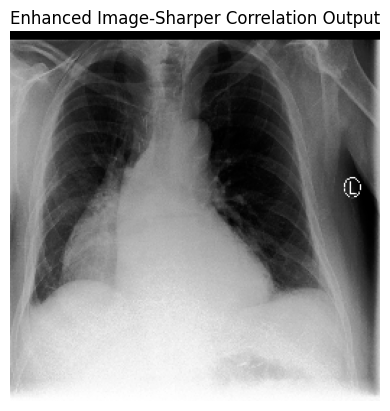

In [28]:

# 4
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
enhanced = cv2.equalizeHist(gray)
plt.imshow(enhanced, cmap='gray')
plt.title('Enhanced Image-Sharper Correlation Output')
plt.axis('off')
plt.show()

- Use cv2.equalizeHist to improve contrast and show an enhanced image that can make correlation outputs sharper.
- Simple preprocessing step to improve detectability of abnormalities.

### 5
- Convolution - best for edge detection (lung disease boundaries)
- Correlation - best for pattern or shape matching (specific regions)
- Combination - both can be used together to enhance diagnostic accuracy.


# Program-2

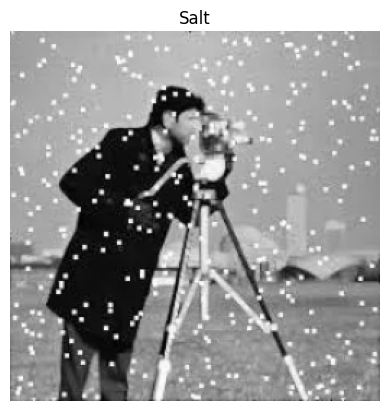

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

salt = cv2.imread('Set-2-Program-2-saltnoise.png', cv2.IMREAD_GRAYSCALE)

salt = cv2.resize(salt, (256, 256))
plt.imshow(salt, cmap='gray')
plt.title('Salt')
plt.axis('off')
plt.show()



Loaded Salt noise and displayed

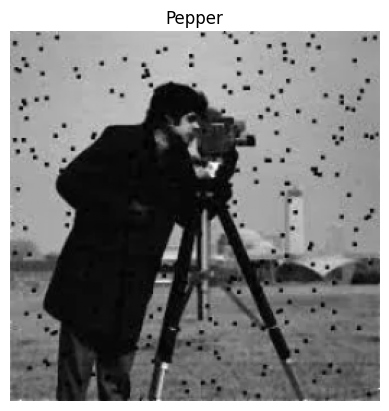

In [30]:
pepper = cv2.imread('Set-2-Program-2-peppernoise.png', cv2.IMREAD_GRAYSCALE)

pepper = cv2.resize(pepper, (256, 256))
plt.imshow(pepper, cmap='gray')
plt.title('Pepper')
plt.axis('off')
plt.show()

Loaded Pepper noise and displayed

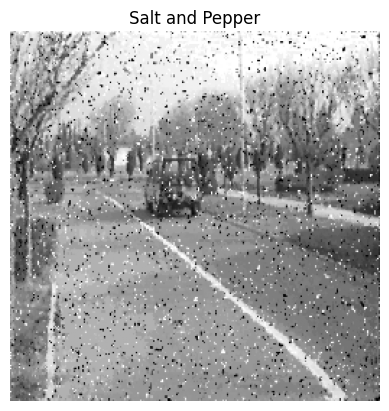

In [31]:
snp = cv2.imread('Set-2-Program-2-Saltandpepper noise.png', cv2.IMREAD_GRAYSCALE)

snp = cv2.resize(snp, (256, 256))
plt.imshow(snp, cmap='gray')
plt.title('Salt and Pepper')
plt.axis('off')
plt.show()

Loaded Salt and Pepper noise and displayed

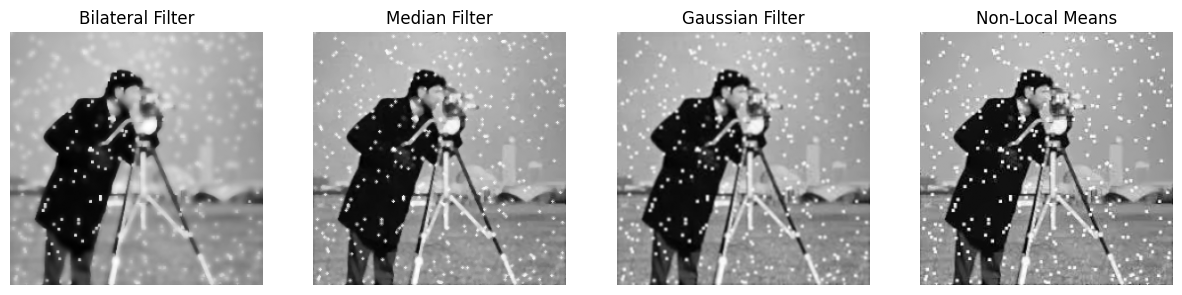

In [32]:
denoised_bilateral = cv2.bilateralFilter(salt, 9, 75, 75)
denoised_median = cv2.medianBlur(salt, 3)
denoised_gaussian = cv2.GaussianBlur(salt, (3,3), 0)
denoised_nlm = cv2.fastNlMeansDenoising(salt)


titles = ['Bilateral Filter', 'Median Filter', 'Gaussian Filter', 'Non-Local Means']
images = [denoised_bilateral, denoised_median, denoised_gaussian, denoised_nlm]

plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

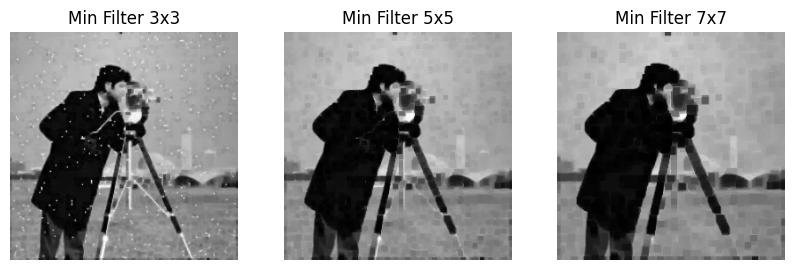

In [33]:
# 1

def min_filter(image, ksize):
    return cv2.erode(image, np.ones((ksize, ksize), np.uint8))

min3 = min_filter(salt, 3)
min5 = min_filter(salt, 5)
min7 = min_filter(salt, 7)

titles = ['3x3', '5x5', '7x7']
imgs = [min3, min5, min7]

plt.figure(figsize=(10,7))
for i in range(3): 
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f'Min Filter {titles[i]}')
    plt.axis('off')
plt.show()

- Implement min filter via cv2.erode and apply 3×3, 5×5, 7×7 removing or enhancing the salt image.
- Min filter (erosion) suppresses bright impulses (salt) by choosing neighborhood minimum. Larger kernels remove larger noise but may erode details.

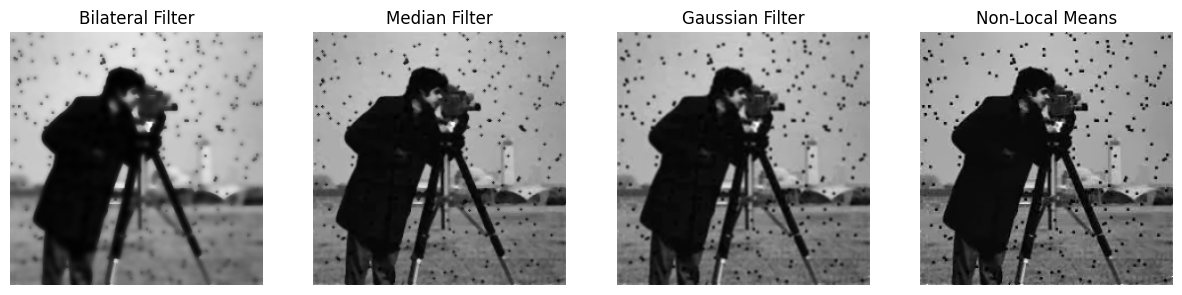

In [34]:
denoised_bilateral = cv2.bilateralFilter(pepper, 9, 75, 75)
denoised_median = cv2.medianBlur(pepper, 3)
denoised_gaussian = cv2.GaussianBlur(pepper, (3,3), 0)
denoised_nlm = cv2.fastNlMeansDenoising(pepper)


titles = ['Bilateral Filter', 'Median Filter', 'Gaussian Filter', 'Non-Local Means']
images = [denoised_bilateral, denoised_median, denoised_gaussian, denoised_nlm]

plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

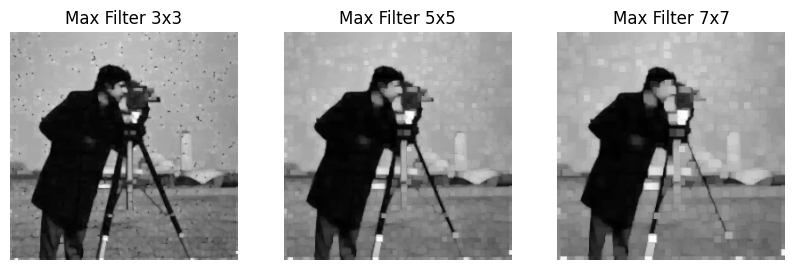

In [35]:
# 2

def max_filter(image, ksize):
    return cv2.dilate(image, np.ones((ksize, ksize), np.uint8))

max3 = max_filter(pepper, 3)
max5 = max_filter(pepper, 5)
max7 = max_filter(pepper, 7)

titles = ['3x3', '5x5', '7x7']
imgs = [max3, max5, max7]
plt.figure(figsize=(10,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f'Max Filter {titles[i]}')
    plt.axis('off')
plt.show()

- Implement max filter via cv2.dilate and apply it to pepper image using 3,5,7 sizes.
- Max filter fills dark impulse pixels (pepper) with neighborhood maxima. Larger kernels remove more pepper but can blur small details.

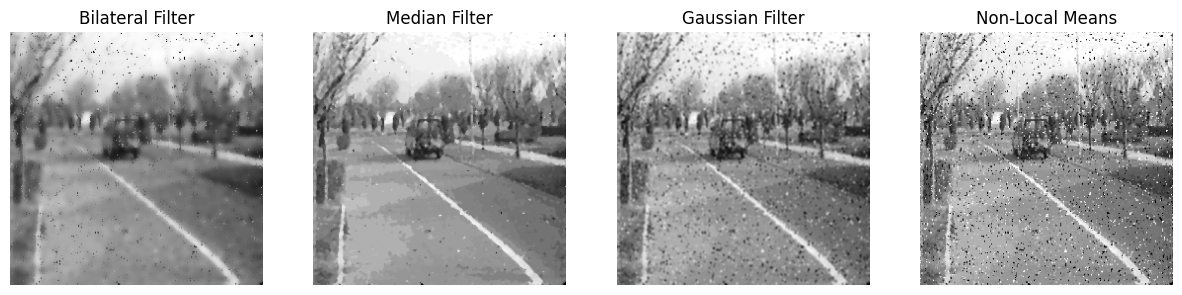

In [36]:

denoised_bilateral = cv2.bilateralFilter(snp, 9, 75, 75)
denoised_median = cv2.medianBlur(snp, 3)
denoised_gaussian = cv2.GaussianBlur(snp, (3,3), 0)
denoised_nlm = cv2.fastNlMeansDenoising(snp)


# Display results
titles = ['Bilateral Filter', 'Median Filter', 'Gaussian Filter', 'Non-Local Means']
images = [denoised_bilateral, denoised_median, denoised_gaussian, denoised_nlm]

plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

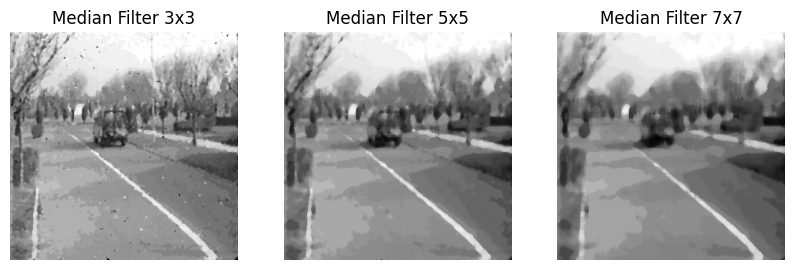

In [37]:
# 3

med3 = cv2.medianBlur(snp, 3)
med5 = cv2.medianBlur(snp, 5)
med7 = cv2.medianBlur(snp, 7)

titles = ['3x3', '5x5', '7x7']
imgs = [med3, med5, med7]

plt.figure(figsize=(10,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f'Median Filter {titles[i]}')
    plt.axis('off')
plt.show()

- Apply built-in cv2.medianBlur with 3,5,7 window sizes to the combined salt-and-pepper image and display results.
- Median is the preferred non‑linear operator for impulsive noise because it replaces each pixel with the median of the neighborhood 
- removes spikes while preserving edges.

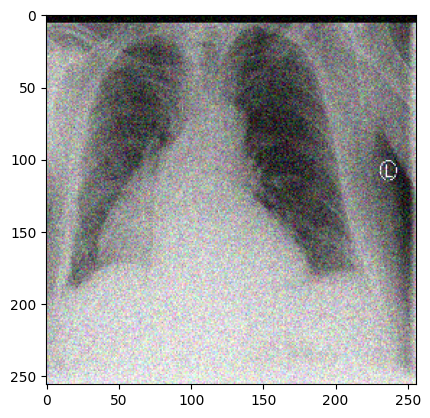

In [38]:
# 4

def midpoint_filter(image, ksize):
    kernel = np.ones((ksize, ksize), np.uint8)
    min_img = cv2.erode(image, kernel)
    max_img = cv2.dilate(image, kernel)
    return ((min_img.astype(np.float32) + max_img.astype(np.float32)) / 2).astype(np.uint8)

# Gaussian noise
noisy_gauss = random_noise(img, mode='gaussian', var=0.01)
noisy_gauss = np.array(255*noisy_gauss, dtype=np.uint8)
plt.imshow(noisy_gauss, cmap='gray')

Gaussian noise is introduced.

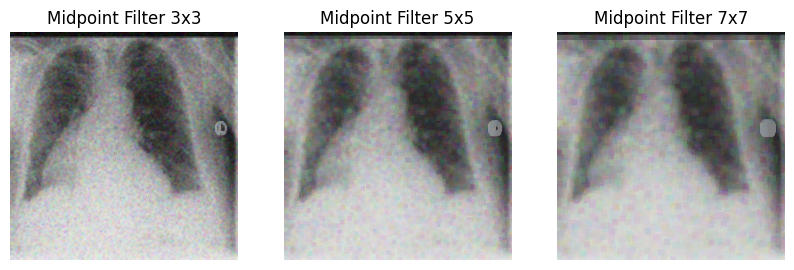

In [39]:
mid3 = midpoint_filter(noisy_gauss, 3)
mid5 = midpoint_filter(noisy_gauss, 5)
mid7 = midpoint_filter(noisy_gauss, 7)

titles = ['3x3', '5x5', '7x7']
imgs = [mid3, mid5, mid7]

plt.figure(figsize=(10,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f'Midpoint Filter {titles[i]}')
    plt.axis('off')

plt.show()

- Non-linear filters like median, min, and max work better for impulsive noise than linear filters because they do not average pixel values, hence preserve image details.

- preserve edges and remove outliers more effectively than linear filters.
